## Neural Network
## Created by Miku

In [1]:
import numpy as np    # numpy is the fundamental package for scientific computing with Python, such linear algebra, array...
import matplotlib.pyplot as plt      # matplotlib is a Python 2D plotting library which produces publication quality figures.

## Logistic Regression Model and Neural Network


In [170]:
class LogisticRegression:
    """
    This lab implements a Logistic Regression Classifier.
    """
    #the number of node be set to 20
    def __init__(self, input_dim, output_dim, method = 1, node_number = 20):
        """
        Initializes the parameters of the logistic regression classifer to 
        random values.
        
        args:
            input_dim: Number of dimensions of the input data
            output_dim: Number of classes
        """
        #the init become 2 parts:
        #the first is to process the input and pass them to the hidden layer
        #the second is to process the input from the hidden layer's output and pass them to the output layer
        if method == 1:
            self.theta = np.random.randn(input_dim, node_number) / np.sqrt(input_dim)
            self.bias = np.zeros((1,node_number))
            self.theta2 = np.random.randn(node_number, output_dim) / np.sqrt(node_number)
            self.bias2 = np.zeros((1, output_dim))
        else:
            self.theta = np.random.randn(input_dim, output_dim) / np.sqrt(input_dim)       
            self.bias = np.zeros((1, output_dim))
            
    #--------------------------------------------------------------------------
    #need to be modified
    def compute_cost(self,X, y):
        """
        Computes the total cost on the dataset.
        
        args:
            X: Data array
            y: Labels corresponding to input data
        
        returns:
            cost: average cost per data sample
        """
        num_examples = np.shape(X)[0]
#       calculate the row number of X
        z = np.dot(X,self.theta) + self.bias
#       dot product the input
        exp_z = np.exp(z)
#         softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        softmax_scores = exp_z / (exp_z + 1)
        
        one_hot_y = np.zeros((num_examples,np.max(y)+1))
        logloss = np.zeros((num_examples,))        
        for i in range(np.shape(X)[0]):
            one_hot_y[i,y[i]] = 1
            logloss[i] = -np.sum(np.log(softmax_scores[i,:]) * one_hot_y[i,:])
        data_loss = np.sum(logloss)
        return 1./num_examples * data_loss
        
    
    def compute_cost_NN1hidden(self,X, y):
        """
        Computes the total cost on the dataset.
        
        args:
            X: Data array
            y: Labels corresponding to input data
        
        returns:
            cost: average cost per data sample
        """
        num_examples = np.shape(X)[0]
        z = np.dot(X,self.theta) + self.bias
        exp_z = np.exp(z)
        #1 / exp_-z + 1
        softmax_scores = exp_z / (exp_z + 1)
        z2 = np.dot(softmax_scores,self.theta2) + self.bias2
        exp_z2 = np.exp(z2)
        softmax_scores = exp_z2 / (exp_z2 + 1)
        one_hot_y = np.zeros((num_examples,np.max(y)+1))
        logloss = np.zeros((num_examples,))        
        for i in range(np.shape(X)[0]):
            one_hot_y[i,y[i]] = 1
            logloss[i] = -np.sum(np.log(softmax_scores[i,:]) * one_hot_y[i,:])
        data_loss = np.sum(logloss)
        return 1./num_examples * data_loss
    
    #--------------------------------------------------------------------------
    #need to be modified
    def predict(self,X):
        """
        Makes a prediction based on current model parameters.
        
        args:
            X: Data array
            
        returns:
            predictions: array of predicted labels
        """
        z = np.dot(X,self.theta) + self.bias
        exp_z = np.exp(z)
        softmax_scores = exp_z / (exp_z + 1)
        predictions = np.argmax(softmax_scores, axis = 1)
        return predictions
    
    def predict_NN1hidden(self,X):
        """
        Makes a prediction based on current model parameters.
        
        args:
            X: Data array
            
        returns:
            predictions: array of predicted labels
        """
        z = np.dot(X,self.theta) + self.bias
        exp_z = np.exp(z)
        softmax_scores = exp_z / (exp_z + 1) 
        z2 = np.dot(softmax_scores,self.theta2) + self.bias2
        exp_z2 = np.exp(z2)
        softmax_scores2 = exp_z2 / (exp_z2 + 1)
        predictions = np.argmax(softmax_scores2, axis = 1)
        return predictions
    
    #--------------------------------------------------------------------------
    # TODO: implement logistic regression using gradient descent 
    #--------------------------------------------------------------------------
    def fit(self,X,y,num_epochs,lr=0.01):
        for epoch in range(0, num_epochs):

            # Forward propagation
            z = np.dot(X,self.theta) + self.bias
            exp_z = np.exp(z)

#           softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)
            softmax_scores = exp_z / (exp_z + 1)
        
            # Backpropagation
            beta = np.zeros_like(softmax_scores)
            one_hot_y = np.zeros_like(softmax_scores)
            for i in range(X.shape[0]):
                one_hot_y[i,y[i]] = 1
            beta = softmax_scores - one_hot_y
    
            # Compute gradients of model parameters
            dtheta = np.dot(X.T,beta)
            dbias = np.sum(beta, axis=0)
    
            self.theta -= lr * dtheta
            self.bias -= lr * dbias
            
        return 0
    
    def fit_NN1hidden(self,X,y,num_epochs,lr):
        for epoch in range(0, num_epochs):

            # Forward propagation
            z = np.dot(X,self.theta) + self.bias
            exp_z = np.exp(z)
            softmax_scores = exp_z / (exp_z + 1)
            z_2 = np.dot(softmax_scores,self.theta2) + self.bias2
            exp_z_2 = np.exp(z_2)
            softmax_scores2 = exp_z_2 / np.sum(exp_z_2, axis=1, keepdims=True)
#             softmax_scores2 = exp_z_2 / (exp_z_2 + 1)
            
            # Backpropagation
            beta_hide = np.zeros_like(softmax_scores2)
            one_hot_y = np.zeros_like(softmax_scores2)
            for i in range(X.shape[0]):
                one_hot_y[i,y[i]] = 1
            beta_hide = softmax_scores2 - one_hot_y
    
            # Compute gradients of model parameters
            dtheta_hide = np.dot(softmax_scores.T,beta_hide)
            dbias_hide = np.sum(beta_hide, axis=0)
    
            # Gradient descent parameter update
#             self.theta2 -= lr * (dtheta_hide + (self.theta2 * self.theta2) / (input_dim * 2))
            self.theta2 -= lr * dtheta_hide
            self.theta2 -= lr * dbias_hide
            
            # Backpropagation
            beta = np.zeros_like(softmax_scores)
            
            #delta2 = (theta2^T·delta3)*g'(z2)
            #g'(z2) = g(z2)(1 - g(z2))
            beta = np.multiply(np.dot(beta_hide, self.theta2.T), np.multiply(softmax_scores, (1 - softmax_scores)))
            
    
            # Compute gradients of model parameters
            dtheta = np.dot(X.T,beta)
            dbias = np.sum(beta, axis=0)
    
            # Gradient descent parameter update
#             self.theta -= lr * (dtheta + (self.theta * self.theta)  / (input_dim * 2))
            self.theta -= lr * dtheta
            self.bias -= lr * dbias
        print(np.shape(self.theta2), np.shape(self.theta))  
        return 0
    




In [171]:
#3 test code
# X = np.genfromtxt('DATA/linearX.csv', delimiter=',') 
# y = np.genfromtxt('DATA/linearY.csv', delimiter=',').astype(np.int64)
# input_dim = np.shape(X)[1]
# output_dim = np.max(y) + 1

# theta1 = np.random.randn(input_dim, output_dim) / np.sqrt(input_dim)
# theta2 = np.random.randn(input_dim, output_dim) / np.sqrt(input_dim)

# bias1 = np.zeros((1, output_dim))
# bias2 = np.zeros((1, output_dim))

# z = np.dot(X,theta1) + bias1
# z1 = np.sum(z, axis=1, keepdims=True)
# exp_z = np.exp(z)
# softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)

# beta = np.zeros_like(softmax_scores)
# one_hot_y = np.zeros_like(softmax_scores)
# for i in range(X.shape[0]):
#     one_hot_y[i] = [y[i],y[i]]
# beta = softmax_scores - one_hot_y
# # a1 = 1 / (exp_z + 1)
# # z2 = np.dot(X,theta2) + bias2
# # exp_z2 = np.exp(-z2)
# # a2 = 1 / (exp_z2 + 1)
# predictions = np.argmax(softmax_scores, axis = 1)
# print(predictions)

In [172]:
def plot_decision_boundary(model, X, y):
    """
    Function to print the decision boundary given by model.
    
    args:
        model: model, whose parameters are used to plot the decision boundary.
        X: input data
        y: input labels
    """
    
    x1_array, x2_array = np.meshgrid(np.arange(-4, 4, 0.01), np.arange(-4, 4, 0.01))
    grid_coordinates = np.c_[x1_array.ravel(), x2_array.ravel()]
    Z = model.predict(grid_coordinates)
    Z = Z.reshape(x1_array.shape)
    plt.contourf(x1_array, x2_array, Z, cmap=plt.cm.bwr)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
    plt.show()

In [173]:
def plot_decision_boundary_NN(model, X, y):
    """
    Function to print the decision boundary given by model.
    
    args:
        model: model, whose parameters are used to plot the decision boundary.
        X: input data
        y: input labels
    """
    
    x1_array, x2_array = np.meshgrid(np.arange(-4, 4, 0.01), np.arange(-4, 4, 0.01))
    grid_coordinates = np.c_[x1_array.ravel(), x2_array.ravel()]
    Z = model.predict_NN1hidden(grid_coordinates)
    Z = Z.reshape(x1_array.shape)
    plt.contourf(x1_array, x2_array, Z, cmap=plt.cm.bwr)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
    plt.show()

## Initialization

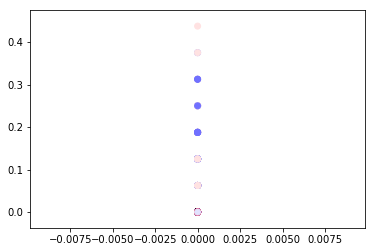

In [174]:
#1. Load and plot data
# X = np.genfromtxt('DATA/linearX.csv', delimiter=',') 
# y = np.genfromtxt('DATA/linearY.csv', delimiter=',').astype(np.int64)
# X = np.genfromtxt('DATA/NONlinearX.csv', delimiter=',') 
# y = np.genfromtxt('DATA/NONlinearY.csv', delimiter=',').astype(np.int64)
X = np.genfromtxt('DATA/Digit_X_train.csv', delimiter=',') 
y = np.genfromtxt('DATA/Digit_y_train.csv', delimiter=',').astype(np.int64)
X_test = np.genfromtxt('DATA/Digit_X_test.csv', delimiter=',') 
y_test = np.genfromtxt('DATA/Digit_y_test.csv', delimiter=',').astype(np.int64)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)
plt.show()

In [181]:
#2. Initialize model
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
logreg = LogisticRegression(input_dim, output_dim)

## Train Classification Model

In [182]:
#3. Train the model, plot decision boundary after trainning
# logreg.fit(X,y,1000,lr=0.01)
logreg.fit_NN1hidden(X,y,1000, lr = 0.0001)
# plot_decision_boundary(logreg, X, y)
# plot_decision_boundary_NN(logreg, X, y)

(20, 10) (64, 20)


0

## Model Evaluation

In [183]:
#4. compute accuracy and confusion matrix
acc = 0
# y_pred = logreg.predict(X)
# y_pred = logreg.predict_NN1hidden(X)
y_pred = logreg.predict_NN1hidden(X_test)
con_mat = np.zeros((output_dim, output_dim))
# for i in range(len(y_pred)):
#     con_mat[y_pred[i], y[i]] += 1
#     if y[i] == y_pred[i]:
#         acc += 1
for i in range(len(y_pred)):
    con_mat[y_pred[i], y_test[i]] += 1
    if y_test[i] == y_pred[i]:
        acc += 1
acc = acc/len(y_pred)
print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  0.8598442714126807
CONFUSION MATRIX: 
 [[ 84.   0.   1.   0.   0.   0.   0.   0.   0.   0.]
 [  0.  67.   0.   0.   0.   1.   1.   0.   6.   0.]
 [  0.   4.  74.   2.   0.   0.   0.   0.   9.   0.]
 [  0.   0.   8.  81.   0.   4.   0.   0.   7.   7.]
 [  1.   4.   0.   0.  85.   1.   0.   1.   2.   0.]
 [  1.   0.   0.   2.   0.  80.   0.   0.   5.   3.]
 [  2.   2.   0.   0.   3.   1.  90.   0.   0.   0.]
 [  0.   0.   0.   2.   4.   0.   0.  87.   2.   3.]
 [  0.   1.   2.   0.   0.   0.   0.   1.  46.   0.]
 [  0.  13.   1.   4.   0.   4.   0.   0.  11.  79.]]


In [162]:
#5. compute cost
# cost = logreg.compute_cost(X,y)
cost = logreg.compute_cost_NN1hidden(X,y)
print (cost)

118.592605706
